In [36]:
%matplotlib inline
from SOLR import *
import numpy
import scipy
import matplotlib.pyplot
#matplotlib.pyplot.rcParams['xtick.direction'] = 'out'
#matplotlib.pyplot.rcParams['ytick.direction'] = 'out'

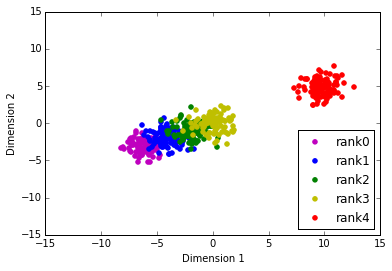

In [37]:
numClass=5
numSampleForEachClass=100
#centerForEachClass=[1,2,3,4,10]
#centerForEachClass=[-3,-1,0,1,3]
#centerForEachClass=[-3,-2,-1,1,3]
centerForEachClass=[-3,-2,-1,0,5]
numFeatureDims=100
y=list()
X=list()
for index_class in range(numClass):
    for index_sample in range(numSampleForEachClass):
        y.append(index_class)
        temporal_feature=numpy.zeros(numFeatureDims)
        temporal_feature[1]=centerForEachClass[index_class]*2
        temporal_feature[2]=centerForEachClass[index_class]*(1)
        X.append(numpy.array(temporal_feature))
X=numpy.array(X)
y=numpy.array(y)
X4training=X+numpy.random.normal(0,1,numpy.shape(X))*1
X4test=X+numpy.random.normal(0,1,numpy.shape(X))*1

#plot data scatter
matplotlib.pyplot.figure()
for index_class in range(numClass):
    if index_class==0:
        str4color='m'
    elif index_class==1:
        str4color='b'
    elif index_class==2:
        str4color='g'
    elif index_class==3:
        str4color='y'
    else:
        str4color='r'
    matplotlib.pyplot.scatter(X4training[y==index_class,1],X4training[y==index_class,2],color=str4color,label='rank' + str(index_class))
matplotlib.pyplot.xlabel("Dimension 1")
matplotlib.pyplot.ylabel("Dimension 2")
matplotlib.pyplot.xlim(-15,15)
matplotlib.pyplot.ylim(-15,15)
matplotlib.pyplot.legend(loc='lower right',scatterpoints=1)
matplotlib.pyplot.show()

In [38]:
solr=SOLR()
dummy=solr.fit(X4training,y)

SOLR (sparse ordinal logistic regression)
# of iterations: 0 ,  # of effective dimensions: 100
# of iterations: 20 ,  # of effective dimensions: 39
# of iterations: 40 ,  # of effective dimensions: 39
# of iterations: 60 ,  # of effective dimensions: 39
# of iterations: 80 ,  # of effective dimensions: 39


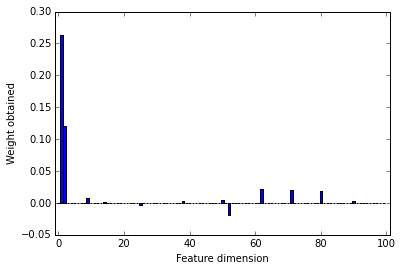

In [39]:
matplotlib.pyplot.bar(range(len(solr.coef_)),solr.coef_,align='center')
matplotlib.pyplot.xlabel("Feature dimension")
matplotlib.pyplot.ylabel("Weight obtained")
matplotlib.pyplot.xlim(-1,len(solr.coef_)+1)
#matplotlib.pyplot.ylim(-15,)
matplotlib.pyplot.show()

In [40]:
from SMLR import *
smlr=SMLR()
smlr.fit(X4training,y)

import sklearn.linear_model
slir=sklearn.linear_model.ARDRegression()
slir.fit(X4training,y)
predictedValue=slir.predict(X4test)
predictedValue=numpy.round(predictedValue)
predictedValue[predictedValue<0]=0
predictedValue[predictedValue>4]=4

SMLR (sparse multinomial logistic regression)
# of iterations: 0 ,  # of effective dimensions: 101
# of iterations: 20 ,  # of effective dimensions: 90
# of iterations: 40 ,  # of effective dimensions: 80
# of iterations: 60 ,  # of effective dimensions: 66
# of iterations: 80 ,  # of effective dimensions: 63


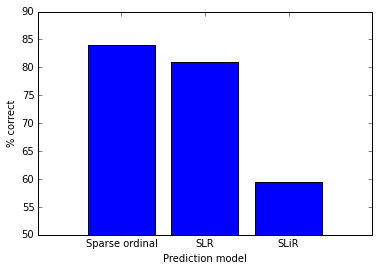

In [41]:
score4SOLR=solr.score(X4test,y)
score4SMLR=smlr.score(X4test,y)

score4SLiR=0
for index_sample in range(len(y)):
    if y[index_sample]==predictedValue[index_sample]:
        score4SLiR=score4SLiR+1
score4SLiR=numpy.double(score4SLiR)/len(y)

matplotlib.pyplot.bar(range(3),numpy.array([score4SOLR,score4SMLR,score4SLiR])*100,align="center")
matplotlib.pyplot.xlabel("Prediction model")
matplotlib.pyplot.ylabel("% correct") 
matplotlib.pyplot.xticks(range(3), ['Sparse ordinal','SLR','SLiR'])
matplotlib.pyplot.xlim(-1,3)
matplotlib.pyplot.ylim(50,90)
matplotlib.pyplot.show()

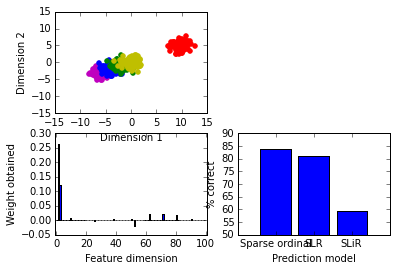

In [43]:
matplotlib.pyplot.subplot(2,2,1)
for index_class in range(numClass):
    if index_class==0:
        str4color='m'
    elif index_class==1:
        str4color='b'
    elif index_class==2:
        str4color='g'
    elif index_class==3:
        str4color='y'
    else:
        str4color='r'
    matplotlib.pyplot.scatter(X4training[y==index_class,1],X4training[y==index_class,2],color=str4color,label='rank' + str(index_class))
matplotlib.pyplot.xlabel("Dimension 1")
matplotlib.pyplot.ylabel("Dimension 2")
matplotlib.pyplot.xlim(-15,15)
matplotlib.pyplot.ylim(-15,15)
#matplotlib.pyplot.legend(loc='lower right',scatterpoints=1)

matplotlib.pyplot.subplot(2,2,3)
matplotlib.pyplot.bar(range(len(solr.coef_)),solr.coef_)
matplotlib.pyplot.xlim(-1,len(solr.coef_)+1)
matplotlib.pyplot.xlabel("Feature dimension")
matplotlib.pyplot.ylabel("Weight obtained")

matplotlib.pyplot.subplot(2,2,4)
matplotlib.pyplot.bar(range(3),numpy.array([score4SOLR,score4SMLR,score4SLiR])*100,align="center")
matplotlib.pyplot.xlabel("Prediction model")
matplotlib.pyplot.ylabel("% correct") 
matplotlib.pyplot.xticks(range(3), ['Sparse ordinal','SLR','SLiR'])
matplotlib.pyplot.xlim(-1,3)
matplotlib.pyplot.ylim(50,90)
matplotlib.pyplot.axis.func_closure
matplotlib.pyplot.show()